In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Lenovo\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Lenovo\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
import nltk


In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


In [7]:
msg=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [8]:
msg[89]

'ham\tEla kano.,il download, come wen ur free..'

In [9]:
msgdf=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [8]:
msgdf.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
msgdf.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
msgdf.groupby('label').count()

,message
label,
ham,4825
spam,747


In [11]:
msgdf.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
msgdf['length']=msgdf['message'].apply(len)

In [13]:
msgdf.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


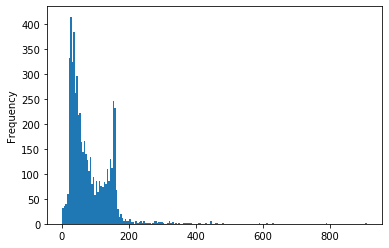

In [14]:
msgdf['length'].plot.hist(bins=200)

In [15]:
msgdf[msgdf['length']>900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF51299548>,
      dtype=object)

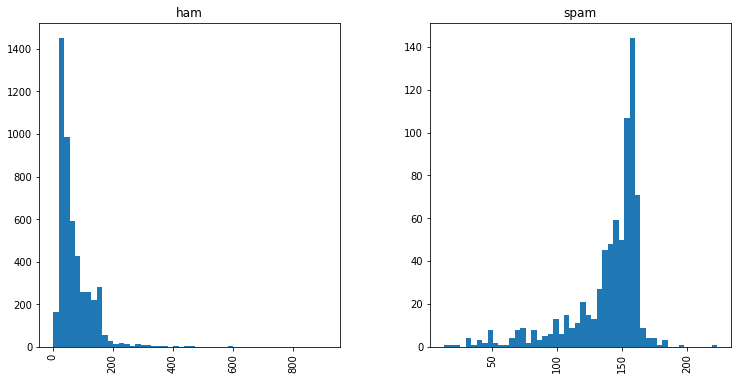

In [16]:
msgdf.hist(column='length',by='label',bins=50,figsize=(12,6))

In [11]:
import string

In [12]:
from nltk.corpus import stopwords

In [13]:
def clean(t):
    npt = [char for char in t if char not in string.punctuation]
    npt=''.join(npt)

    ct=[w for w in npt.split() if w.lower() not in stopwords.words('english')]
    return ct

In [20]:
m="my name is jimon!!!!"
b=clean(m)
b

['name', 'jimon']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
bow=CountVectorizer(analyzer=clean).fit(msgdf['message'])

In [23]:
print(len(bow.vocabulary_))

11425


In [24]:
#eg 0f how bag of words(bow) looks like

In [25]:
msg4=msgdf['message'][3]

In [26]:
bow4=bow.transform([msg4])

In [27]:
print(bow4)
#shows we have 7 clean words in msg and out of those 7 two words are used twice

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [28]:
bow.get_feature_names()[4068]
#this word is repeated twice

'U'

In [29]:
#end of example

In [21]:
msg_bow=bow.transform(msgdf['message'])

In [31]:
print(msg_bow.shape)

(5572, 11425)


In [32]:
msg_bow.nnz
#non zero occurence of words

50548

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
tfidf_trans=TfidfTransformer().fit(msg_bow)

In [28]:
tfidf4=tfidf_trans.transform(bow4)

NameError: name 'bow4' is not defined

In [36]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [39]:
#for a particular word
print(tfidf_trans.idf_[bow.vocabulary_['U']])

3.966206571809915


In [40]:
#for complete msg

In [41]:
msg_tfidf=tfidf_trans.transform(msg_bow)

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
spam_detect=MultinomialNB().fit(msg_tfidf,msgdf['label'])

NameError: name 'msg_tfidf' is not defined

In [47]:
spam_detect.predict(tfidf4)[0]

'ham'

In [ ]:
spam_detect.predict['label'][22]

In [2]:
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.model_selection import train_test_split

In [32]:
msg_train,msg_test,label_train,label_test=train_test_split(msgdf['message'],msgdf['label'],test_size=0.3)

In [37]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=clean)),
     ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [38]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function clean at 0x000001FBDFD6F438>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [39]:
pred=pipeline.predict(msg_test)

In [40]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1463
        spam       1.00      0.67      0.81       209

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.96      1672

